In [1]:
import pandas as pd
import pyvis
import snap

In [2]:
data = pd.read_csv('/Users/diegoportillaamarillas/Downloads/facebook_combined.txt', sep=' ', header=None)
data.columns = ['person1', 'person2']

sample = data.sample(2000, random_state=1)

In [3]:
sample.head()

person1  person2
74346     2839     3064
62630     2309     2590
199          0      200
51398     2088     2468
27375     1319     1568

In [4]:
net = pyvis.network.Network(
    notebook=True,
    cdn_resources='remote',
    bgcolor='#222222',
    font_color='white',
    height='750px',
    width='100%',
)

nodes= list(set([*sample.person1, *sample.person2]))
edges = sample.values.tolist()
net.add_nodes(nodes)
net.add_edges(edges)

## Degree Distribution, Clustering, Diameter


In [5]:
fb_graph = snap.LoadEdgeList(snap.TNGraph, '/Users/diegoportillaamarillas/Downloads/facebook_combined.txt', 0, 1)

In [6]:
print(f'Edges:{fb_graph.GetEdges()} Nodes: {fb_graph.GetNodes()}')

Edges:88234 Nodes: 4039


In [7]:
random_graph = snap.GenRndGnm(snap.TUNGraph, 4039, 88234)

In [8]:
fb_clust_cf = fb_graph.GetClustCf()
rdm_clust_cf = random_graph.GetClustCf()

fb_diam = fb_graph.GetBfsFullDiam(4039, False)
rdm_diam = random_graph.GetBfsFullDiam(4039, False)


fb_clust_cf, rdm_clust_cf

(0.6055467186200861, 0.010752791133514924)

In [9]:
fb_diam, rdm_diam

(8, 4)

In [10]:
centralities = {}
PRankH = fb_graph.GetPageRank()
for item in PRankH:
    centralities[item] = PRankH[item]

    

In [11]:
print(max(centralities),':',centralities.get(max(centralities)))

4038 : 0.0007940348679254801


In [29]:
centralities_random = {}
PRankH = random_graph.GetPageRank()
for item in PRankH:
    centralities_random[item] = PRankH[item]


In [30]:
print(max(centralities_random),':',centralities_random.get(max(centralities_random)))

4038 : 0.0002723192243886212


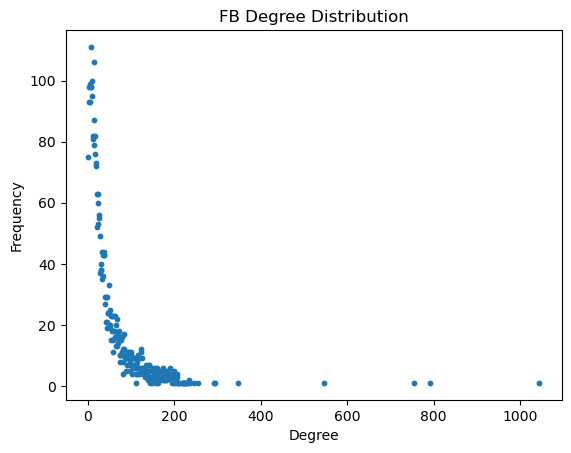

In [12]:
import matplotlib.pyplot as plt

# Get the degree sequence of the graph
degree_seq = snap.TIntV()
snap.GetDegSeqV(fb_graph, degree_seq)

# Calculate the degree frequency distribution
degree_counts = {}
for degree in degree_seq:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Plot the degree distribution
degrees = list(degree_counts.keys())
frequency = list(degree_counts.values())

plt.scatter(degrees, frequency, s=10, cmap='twilight')
#plt.loglog(degrees,frequency,'o', markersize=2)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("FB Degree Distribution")
plt.show()

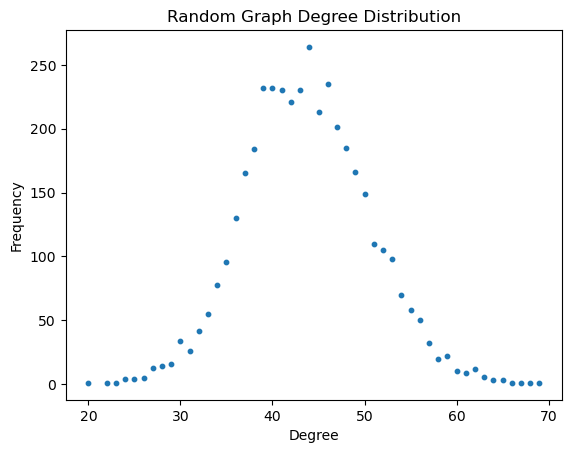

In [33]:
snap.GetDegSeqV(random_graph, degree_seq)

# Calculate the degree frequency distribution
degree_counts = {}
for degree in degree_seq:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Plot the degree distribution
degrees = list(degree_counts.keys())
frequency = list(degree_counts.values())

plt.scatter(degrees, frequency, s=10)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Random Graph Degree Distribution")
plt.show()

## Barabasi albert model

In [40]:
# Barabasi Albert Random Graph
Rnd = snap.TRnd()

BA_graph = snap.GenPrefAttach(2000, 50, Rnd)

BA_cluster = BA_graph.GetClustCf()

BA_diam = BA_graph.GetBfsFullDiam(2000, False)




In [42]:
BA_clt_diam = {'BA Cluster':BA_cluster, 'BA Diameter':BA_diam}
BA_clt_diam

{'BA Cluster': 0.12298625899481179, 'BA Diameter': 3}

In [44]:
NIdEigenH = BA_graph.GetEigenVectorCentr()
for item in NIdEigenH:
    print("node: %d centrality: %f" % (item, NIdEigenH[item]))

node: 0 centrality: 0.068779
node: 1 centrality: 0.079627
node: 2 centrality: 0.077256
node: 3 centrality: 0.075320
node: 4 centrality: 0.072966
node: 5 centrality: 0.075154
node: 6 centrality: 0.080273
node: 7 centrality: 0.074246
node: 8 centrality: 0.081083
node: 9 centrality: 0.078363
node: 10 centrality: 0.079530
node: 11 centrality: 0.076548
node: 12 centrality: 0.075506
node: 13 centrality: 0.077655
node: 14 centrality: 0.076177
node: 15 centrality: 0.075349
node: 16 centrality: 0.073132
node: 17 centrality: 0.074160
node: 18 centrality: 0.075239
node: 19 centrality: 0.075282
node: 20 centrality: 0.076210
node: 21 centrality: 0.076414
node: 22 centrality: 0.067003
node: 23 centrality: 0.077284
node: 24 centrality: 0.075898
node: 25 centrality: 0.076252
node: 26 centrality: 0.076898
node: 27 centrality: 0.077080
node: 28 centrality: 0.079433
node: 29 centrality: 0.071663
node: 30 centrality: 0.076628
node: 31 centrality: 0.078382
node: 32 centrality: 0.076712
node: 33 centrality:

In [45]:
for NI in BA_graph.Nodes():
    DegCentr = BA_graph.GetDegreeCentr(NI.GetId())
    print("node: %d centrality: %f" % (NI.GetId(), DegCentr))

node: 0 centrality: 0.178589
node: 1 centrality: 0.212606
node: 2 centrality: 0.210105
node: 3 centrality: 0.202601
node: 4 centrality: 0.193097
node: 5 centrality: 0.207604
node: 6 centrality: 0.225613
node: 7 centrality: 0.192596
node: 8 centrality: 0.222611
node: 9 centrality: 0.215108
node: 10 centrality: 0.219110
node: 11 centrality: 0.210105
node: 12 centrality: 0.203102
node: 13 centrality: 0.208604
node: 14 centrality: 0.195598
node: 15 centrality: 0.193597
node: 16 centrality: 0.191096
node: 17 centrality: 0.198599
node: 18 centrality: 0.205603
node: 19 centrality: 0.205603
node: 20 centrality: 0.207604
node: 21 centrality: 0.198599
node: 22 centrality: 0.173087
node: 23 centrality: 0.211606
node: 24 centrality: 0.203102
node: 25 centrality: 0.200600
node: 26 centrality: 0.209105
node: 27 centrality: 0.217609
node: 28 centrality: 0.212606
node: 29 centrality: 0.180090
node: 30 centrality: 0.210105
node: 31 centrality: 0.211106
node: 32 centrality: 0.201101
node: 33 centrality:

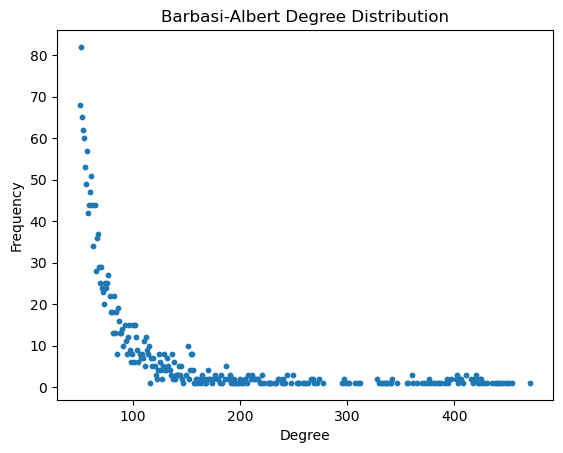

In [41]:
snap.GetDegSeqV(BA_graph, degree_seq)

# Calculate the degree frequency distribution
degree_counts = {}
for degree in degree_seq:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Plot the degree distribution
degrees = list(degree_counts.keys())
frequency = list(degree_counts.values())

plt.scatter(degrees, frequency, s=10)
#plt.loglog(degrees,frequency, 'o', markersize=2)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Barbasi-Albert Degree Distribution")
plt.show()

In [46]:
Nodes, Edges = BA_graph.GetBetweennessCentr(1.0)
for node in Nodes:
    print("node: %d centrality: %f" % (node, Nodes[node]))
for edge in Edges:
    print("edge: (%d, %d) centrality: %f" % (edge.GetVal1(), edge.GetVal2(), Edges[edge]))

node: 0 centrality: 7827.980221
node: 1 centrality: 10654.740530
node: 2 centrality: 11200.271283
node: 3 centrality: 9972.108972
node: 4 centrality: 9146.980035
node: 5 centrality: 10969.344031
node: 6 centrality: 13566.075235
node: 7 centrality: 8630.532583
node: 8 centrality: 12159.553186
node: 9 centrality: 11638.447199
node: 10 centrality: 11979.658943
node: 11 centrality: 11104.804658
node: 12 centrality: 10082.726307
node: 13 centrality: 10375.373396
node: 14 centrality: 8520.277022
node: 15 centrality: 8421.507980
node: 16 centrality: 8196.027765
node: 17 centrality: 9293.813860
node: 18 centrality: 10640.620756
node: 19 centrality: 11083.207407
node: 20 centrality: 10943.743078
node: 21 centrality: 9095.580354
node: 22 centrality: 7493.428262
node: 23 centrality: 11290.072119
node: 24 centrality: 10453.496739
node: 25 centrality: 9051.209326
node: 26 centrality: 10513.885724
node: 27 centrality: 12603.968267
node: 28 centrality: 10888.105025
node: 29 centrality: 7187.511065
no

## Watts Graph strogats


In [ ]:
Rnd = snap.TRnd(1,0)
small_world = snap.GenSmallWorld(2000, 200, 0.30, Rnd)

In [ ]:
watts_cluster = small_world.GetClustCf()

watts_diam = small_world.GetBfsFullDiam(2000, False)

In [ ]:
watts_clt_diam = {'Watts Cluster':watts_cluster, 'Watts_diam':watts_diam}
watts_clt_diam

{'Watts Cluster': 0.35995414618548044, 'Watts_diam': 2}

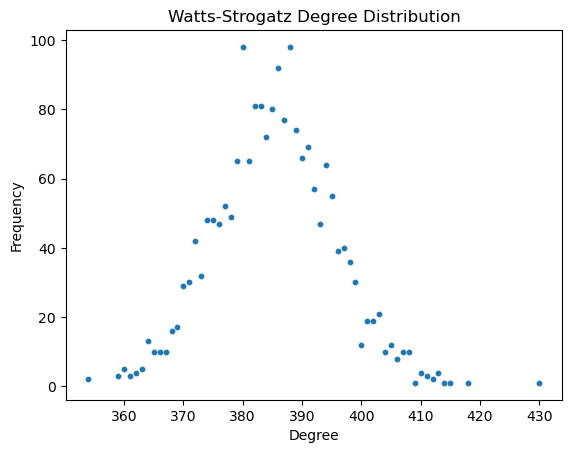

In [ ]:
snap.GetDegSeqV(small_world, degree_seq)

# Calculate the degree frequency distribution
degree_counts = {}
for degree in degree_seq:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Plot the degree distribution
degrees = list(degree_counts.keys())
frequency = list(degree_counts.values())

plt.scatter(degrees, frequency, s=10)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Watts-Strogatz Degree Distribution")
plt.show()

In [ ]:
Nodes, Edges = small_world.GetBetweennessCentr(1.0)

NameError: name 'small_world' is not defined